In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [3]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [4]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_bold"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=10))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [5]:
get_plots <- function(subcluster_base_path, input_ls, annotations, input, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        print(min(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.001, ymax=input, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] 0.009713
[1] -0.000177


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.029132
[1] -0.000287


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.007397
[1] -4.5e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.00687
[1] -6.3e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.00724
[1] -1.4e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.007549
[1] -7e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.0058
[1] -1.3e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.007618
[1] -0.000155


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.011393
[1] -0.000273


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.004786
[1] -4.6e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.004557
[1] -1.8e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.005383
[1] -6.4e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.007926
[1] -0.000242


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.006581
[1] -6.4e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.006816
[1] -0.000135


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


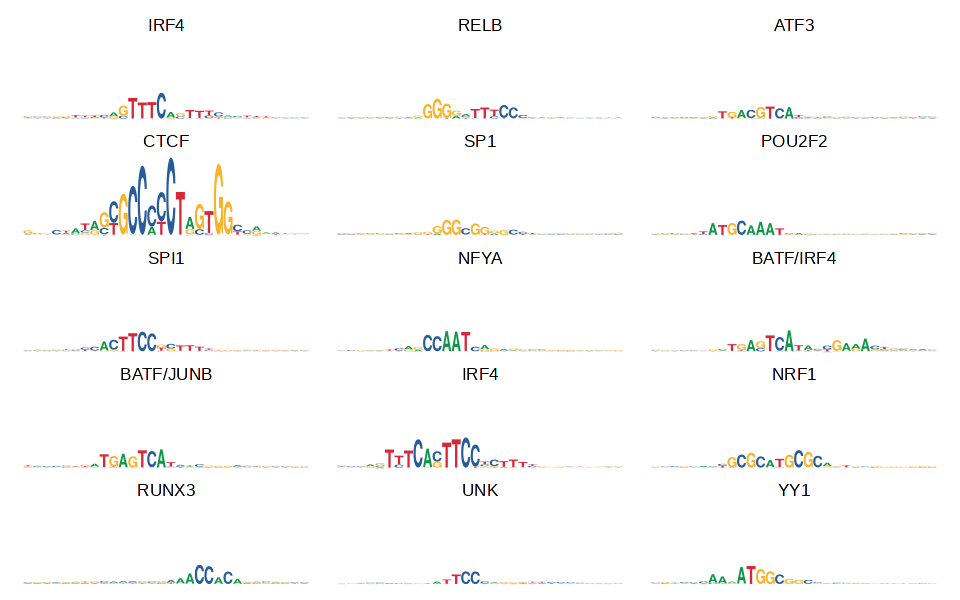

In [8]:

options(repr.plot.width = 8, repr.plot.height = 5)

#atac_annotations = read.table("naked_dna/ATAC/profile_annotations.csv",sep=",", header=FALSE)
atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/GM12878_12.03.2022_1234_8_2114_0_hepg2_transfer_bias/profile_annotations_chip.tsv",sep=",", header=FALSE)


colnames(atac_annotations) = c("key","label")

profile_annotations = atac_annotations
#all_plots = get_plots("naked_dna/ATAC/profile_0_%d.pfm", seq(0,14), atac_annotations, 0.042,
#                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
all_plots = get_plots("naked_dna/transfer/profile_0_%d.pfm", seq(0,14), atac_annotations, 0.03,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

ggsave("naked_dna/transfer/gm12878_profile_hep_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)


In [10]:
atac_counts = read.table("naked_dna/ATAC/profile_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


In [11]:
new = merge(atac_annotations,atac_counts)[c("label", "counts")]

In [12]:
new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
profile_annotations = new_combined

In [13]:
new_combined

,label,counts,id,total
,<chr>,<int>,<dbl>,<dbl>
1,BATF/IRF4,127,1,0.7350813
2,BATF/JUNB,1601,1,9.2666551
3,CTCF,4013,1,23.2274122
4,GC,5489,1,31.7705620
5,IRF4,2347,1,13.5845344
6,NFYB,343,1,1.9852984
7,RELB,787,1,4.5551890
8,RUNX3,532,1,3.0792383
9,SP1,863,1,4.9950802


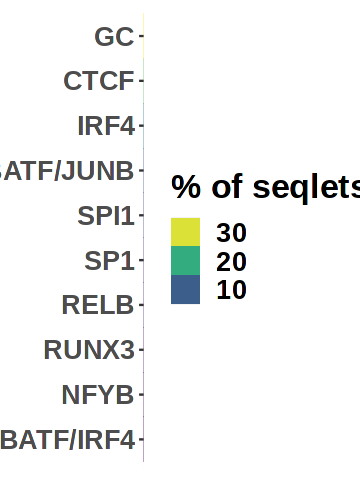

In [14]:
options(repr.plot.width = 3, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total)
, fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=20, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

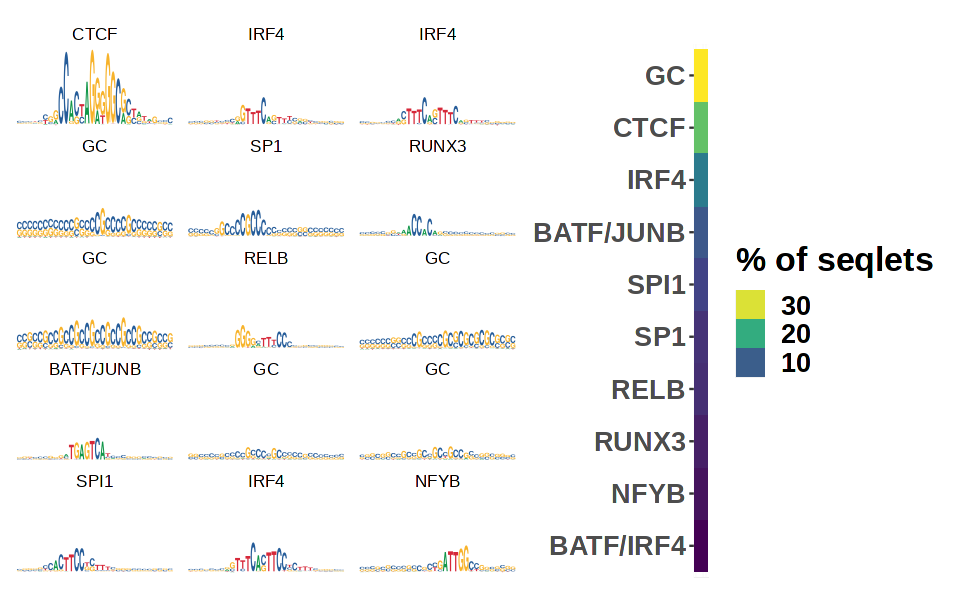

In [15]:
options(repr.plot.width = 8, repr.plot.height = 5)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_profile_modisco.pdf", device = "pdf",  width = 12, height = 5, dpi = 300)


[1] 0.073176
[1] -0.000923


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.065095
[1] -0.000456


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.073186
[1] -0.000851


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.059939
[1] -0.000688


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.063522
[1] -8.5e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.079416
[1] -0.001745


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.064335
[1] -0.000952


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.042383
[1] -0.000136


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.05308
[1] -0.000594


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.046493
[1] -0.000279


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.073833
[1] -0.001631


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.0647
[1] -0.001621


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.048739
[1] -0.000357


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.048643
[1] -0.00013


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.064579
[1] -0.000704


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


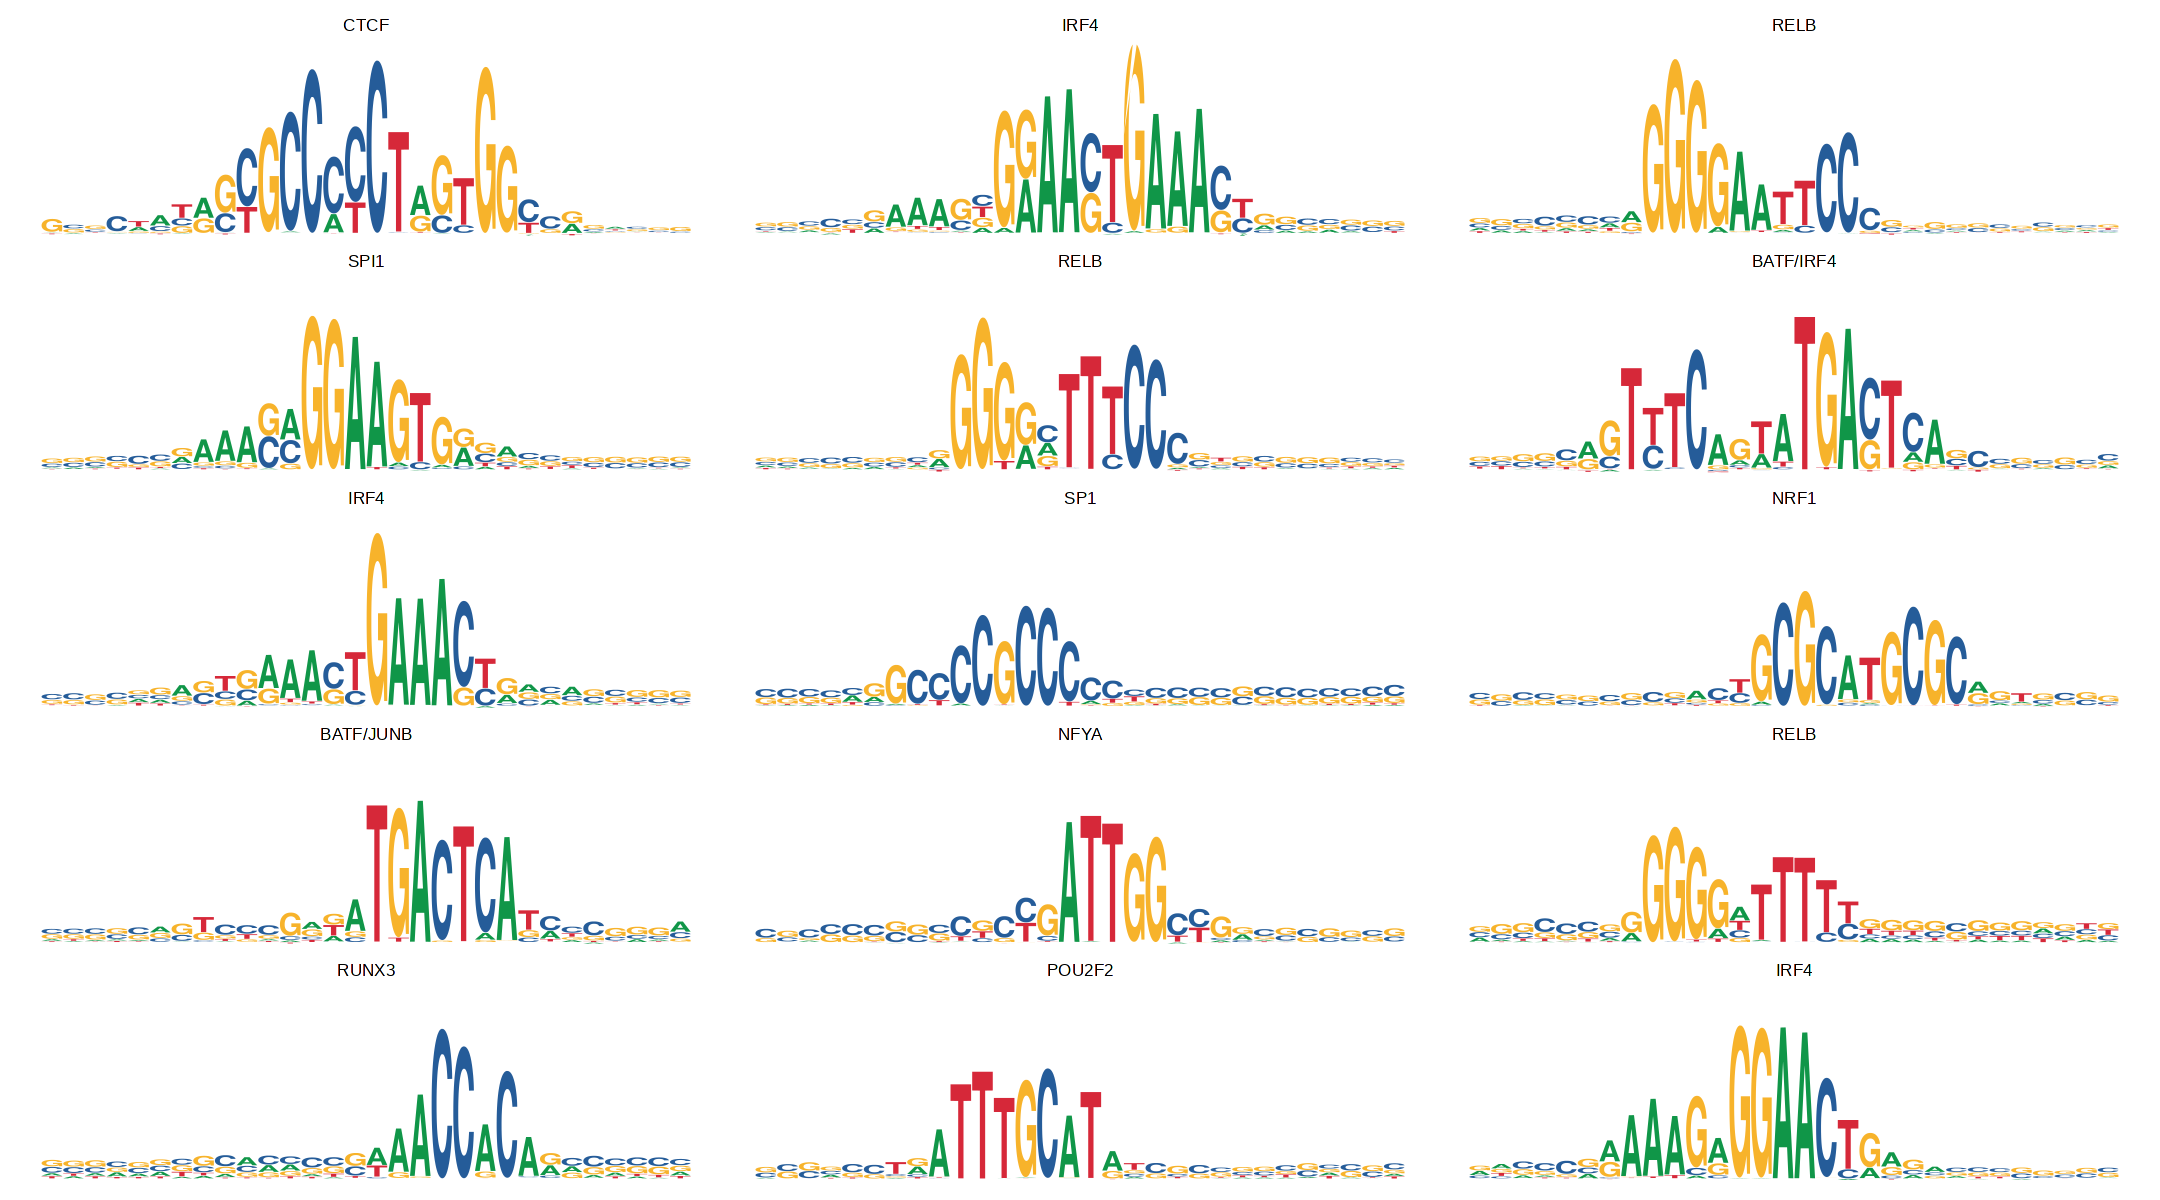

In [17]:

options(repr.plot.width = 18, repr.plot.height = 10)

atac_annotations = read.table("naked_dna/ATAC/counts_annotations.csv",sep=",", header=FALSE)


colnames(atac_annotations) = c("key","label")


all_plots = get_plots("naked_dna/ATAC/counts_0_%d.pfm", seq(0,14), atac_annotations, 0.080,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, nrow=5, byrow=FALSE)

ggsave("naked_dna/ATAC/gm12878_counts_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)

#ggsave("k562_counts_modisco.pdf", device = "pdf",  width = 6, height = 6, dpi = 300)


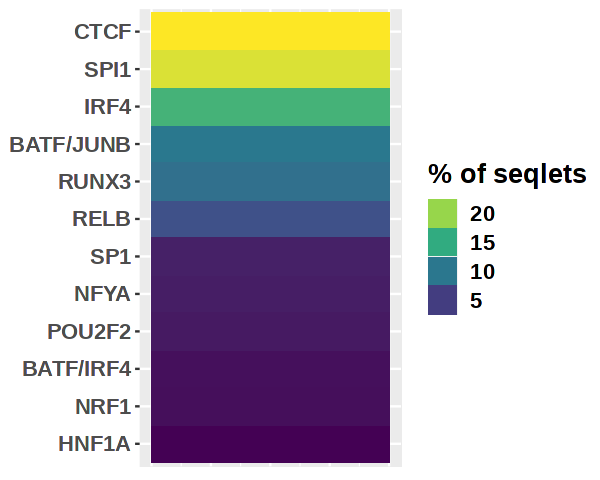

In [18]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


new = merge(atac_annotations,atac_counts, all=FALSE)[c("label", "counts")]

new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100.0/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
count_annotations = new_combined
#print(new_combined)
options(repr.plot.width = 5, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total), fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=16, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

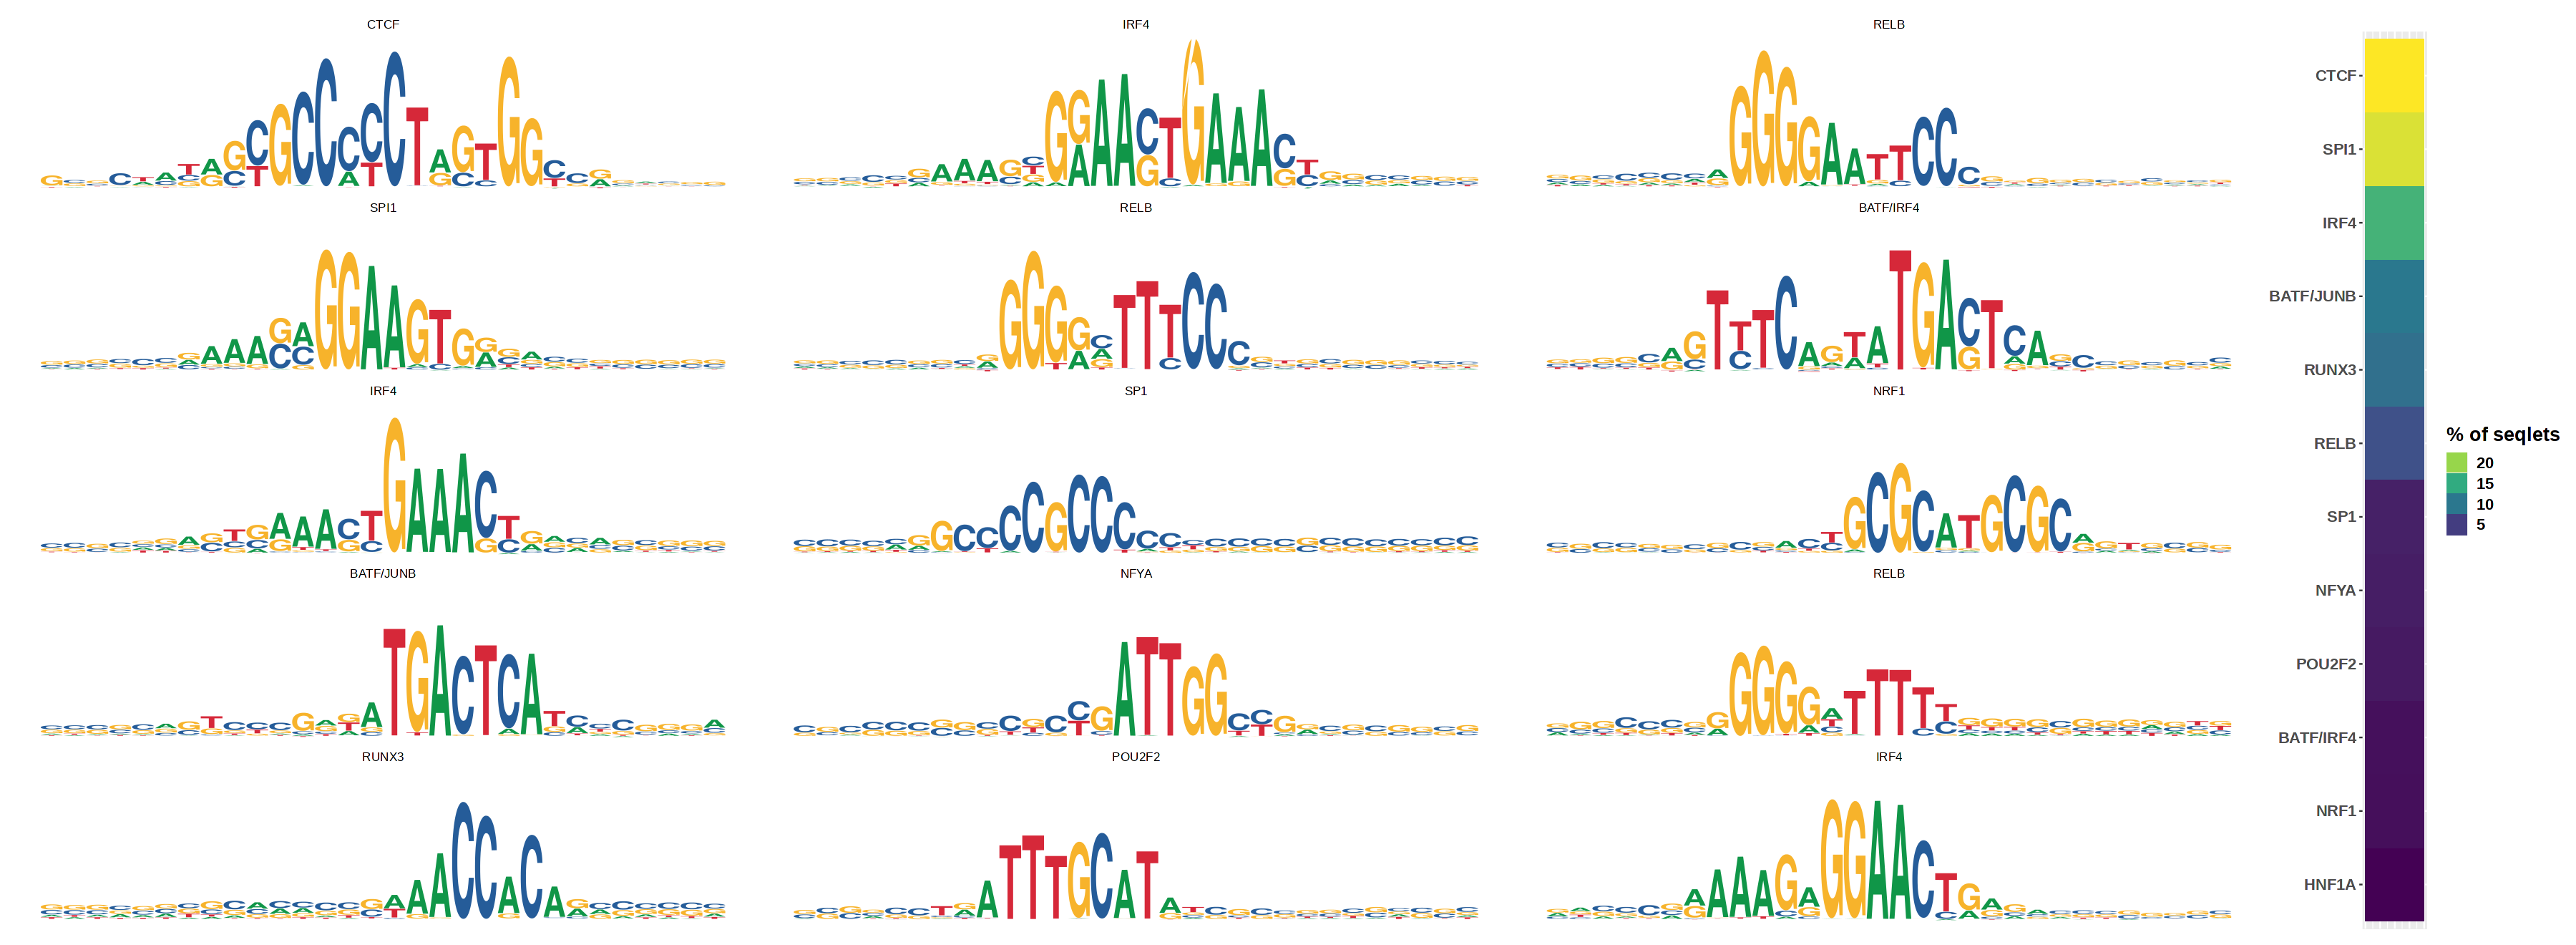

In [19]:
options(repr.plot.width = 30, repr.plot.height = 11)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_counts_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)
